# Time delay *surface*

Now that we understood how the time-delay function behaves in one dimension, we can move forward and consider the time-delay surface. In particular, we consider now the potential of an axially symmetric lens. The one-dimensional case discussed above was actually corresponding to the azimuthal cut of the time-delay surface we will consider in this example. Again, we will move the source relative to the lens to see how the time-delay surface  is modified.

<IPython.core.display.Javascript object>


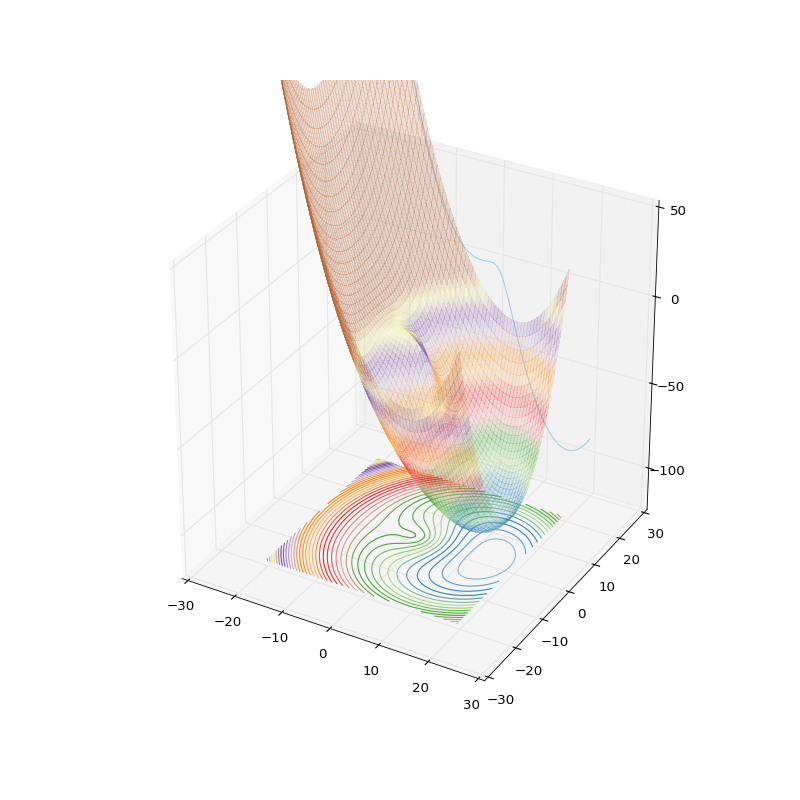

(-121.3313442447777, 50)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(-30.0,30.0,1000)

# the time delay surface

def t_grav_surf(size, npix=500, theta_c = 1.0, center=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt((x-x0)*(x-x0)*pixel*pixel+(y-y0)*(y-y0)*pixel*pixel+theta_c*theta_c)*10

# the geometrical time delay
def t_geom_surf(size, npix=500, beta=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)*pixel
    y = x[:,np.newaxis]

    
    if beta is None:
        x0 = y0 = npix / 2*pixel
    else:
        x0 = beta[0]+npix/2*pixel
        y0 = beta[1]+npix/2*pixel

    return 0.5*((x-x0)*(x-x0)+(y-y0)*(y-y0))


# the position of the source is now defined by the vector beta_
beta=5.0
beta_=[beta,0.0]

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0


t_grav_surf=t_grav_surf(size,npix=npix,theta_c=2.0)
t_geom_surf=t_geom_surf(size,npix=npix,beta=beta_)


from matplotlib import cm
import pylab




#THIS SHOULD BE UN-COMMENTED FOR INTERACTIVE DISPLAY
%matplotlib notebook   

# activate the interactive display mode
plt.ion()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xa=np.arange(-npix/2, npix/2, 1)
ya=np.arange(-npix/2, npix/2, 1)



# I will show the contours levels projected in the x-y plane
levels=np.linspace(np.amin(t_geom_surf+t_grav_surf),np.amax(t_geom_surf+t_grav_surf),40)


pixel_size=size/(npix-1)
X, Y = np.meshgrid(xa*pixel_size, ya*pixel_size)
ax.plot_surface(X,Y,t_geom_surf+t_grav_surf,vmax=5,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
                       linewidth=0, antialiased=False,alpha=0.2)

cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=-30, cmap=plt.get_cmap('Paired'),levels=[0])
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=30, cmap=plt.get_cmap('Paired'),levels=[0])
ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 50)

Try to re-run the code above with the source shifted by 3".

# Elliptical lenses

Now we modify the potential such to make it elliptical! To do that, we sustitute 
$$|\theta| \rightarrow \sqrt{\frac{\theta_1^2}{1-\epsilon}+\theta_2^2(1-\epsilon)}$$
where $\epsilon$ is the lens ellipticity.

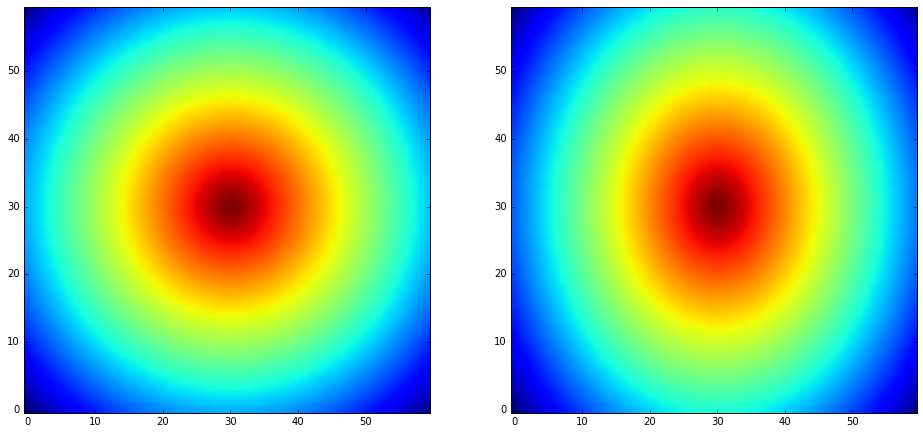

In [50]:
def t_grav_surf_ell(size, npix=500, theta_c = 1.0, center=None, ell=0.0):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt(((x-x0)*pixel)**2/(1-ell)+((y-y0)*pixel)**2*(1-ell)+theta_c*theta_c)*10

%matplotlib inline

t_grav_surf0=t_grav_surf_ell(size,npix=npix,ell=0.0,theta_c=1.0)
t_grav_surf=t_grav_surf_ell(size,npix=npix,ell=0.2,theta_c=1.0)


fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(t_grav_surf0,origin='lower')
ax[1].imshow(t_grav_surf,origin='lower')

This shows that the iso-potentials are stretched along the y-axis.

Now change the ellipticity and the source postion $\beta$ to produce any kind of image configuration.

<IPython.core.display.Javascript object>


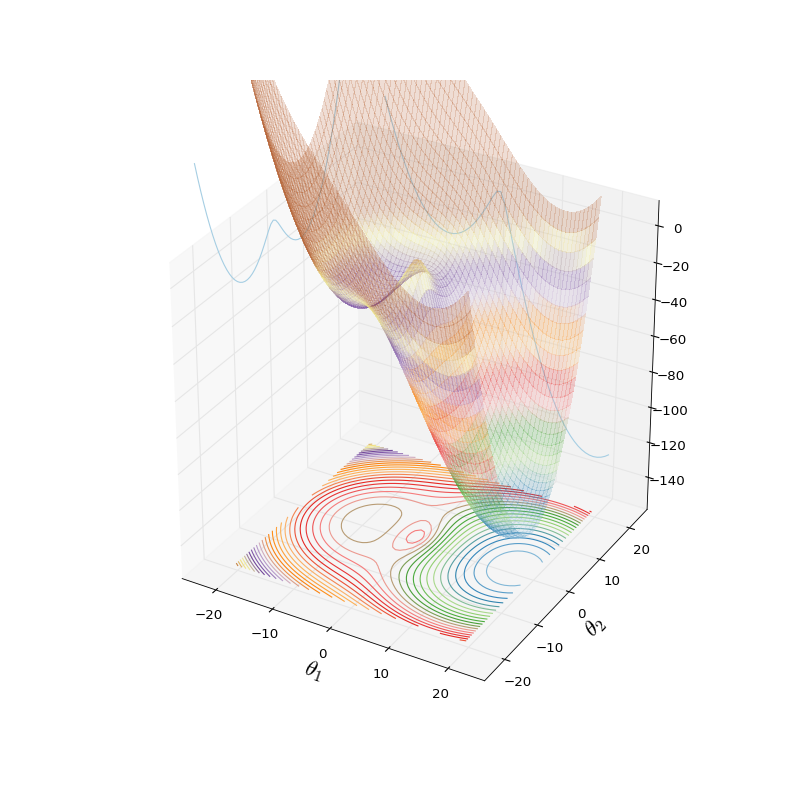

In [54]:
# the geometrical time delay
def t_geom_surf(size, npix=500, beta=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)*pixel
    y = x[:,np.newaxis]

    
    if beta is None:
        x0 = y0 = npix / 2*pixel
    else:
        x0 = beta[0]+npix/2*pixel
        y0 = beta[1]+npix/2*pixel

    return 0.5*((x-x0)*(x-x0)+(y-y0)*(y-y0))



# the position of the source is now defined by the vector beta_
beta=4.0
#beta_=[0,0]  # source along the theta_1 axis
beta_=[beta,0] # source along the theta_2 axis
#beta_=[beta,beta] # source along the diagonal

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0


t_grav_surf=t_grav_surf_ell(size,npix=npix,ell=0.4,theta_c=1.0)
t_geom_surf=t_geom_surf(size,npix=npix,beta=beta_)

from matplotlib import cm
import pylab


#THIS SHOULD BE UN-COMMENTED FOR INTERACTIVE DISPLAY
%matplotlib notebook   
plt.ion()

#THIS SHOULD BE COMMENTED FOR INTERACTIVE DISPLAY
#%matplotlib inline     



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xa=np.arange(-npix/2, npix/2, 1)
ya=np.arange(-npix/2, npix/2, 1)



# I will show the contours levels projected in the x-y plane
levels=np.linspace(np.amin(t_geom_surf+t_grav_surf),np.amax(t_geom_surf+t_grav_surf),40)

minx=-25
maxx=-minx

miny=-25
maxy=-miny


pixel_size=size/(npix-1)
X, Y = np.meshgrid(xa*pixel_size, ya*pixel_size)
ax.plot_surface(X,Y,t_geom_surf+t_grav_surf,vmax=2,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
                       linewidth=0, antialiased=False,alpha=0.2)

cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=minx, cmap=plt.get_cmap('Paired'),levels=[0])
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=maxy, cmap=plt.get_cmap('Paired'),levels=[0])
ax.set_xlim3d(minx, maxx)
ax.set_ylim3d(miny, maxy)
ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 10)
ax.set_xlabel(r'$\theta_1$',fontsize=20)
ax.set_ylabel(r'$\theta_2$',fontsize=20)

plt.show()

# The time delay surface of a realistic lens

We can now investigate the shape of the time delay surface of a more realistic mass distribution (e.g. the lens we considered in the past lectures).

The following script shows how to visualize the time-delay surface once the source position behind the lens has been chosen. Given the units of the potential, this has to be specified in pixels.

The procedure is as follows:
* first, we construct the deflector using the ```deflector``` class;
* the gravitational time-delay is proportional to the lensing potential, which is computed as discussed in Lect. 7;
* the geometrical time-delay requires the definition of a mesh on the lens plane. Then, for each point on the mesh, we compute the distance from the source position (in pixels on the lens plane);
* obviously, the total time delay is the sum of the geometrical and gravitational terms;
* We visualize the total time delay surface as projected on the image plane. The units are arbitrary at this point and we also choose to set the minimum of the time delay surface at 0;
* To better understand the location of the stationary points, we display several contour levels;
* We create two images: on the right panel, we show the caustics of the lens and we mark the position of the source with a red dot; on the left, we overlay the critical lines onto the time-delay map;
* By changing the position of the source with respect to the lens, we can see how the time delay surface, and the image configuration change.

(192, 320)

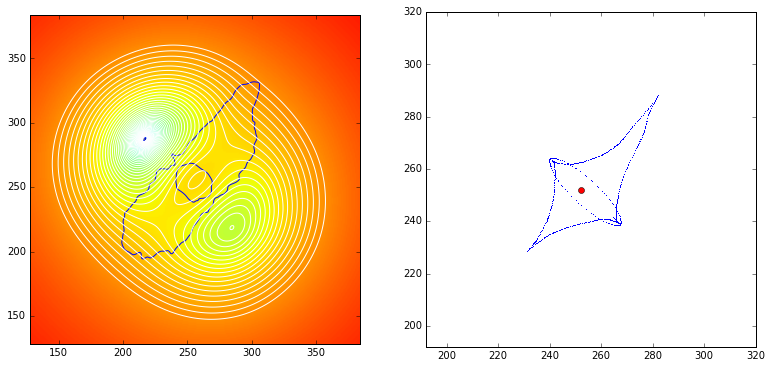

In [62]:
import deflector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
from scipy.ndimage import map_coordinates

%matplotlib inline
plt.ioff()

df=deflector.deflector('data/kappa_gl.fits',True)
a1,a2=df.angle_map()
ka=df.convergence_map()
gamma_1,gamma_2=df.shear_map()
gamma=np.sqrt(gamma_1**2+gamma_2**2)
detA=(1.-ka)**2-gamma**2



# critical line and caustics

fig,ax=plt.subplots(1,2,figsize=(13,6))
cs=ax[0].contour(detA,levels=[0.0],visible=False,colors=['blue'])
contour=cs.collections[0]
p=contour.get_paths() # p contains the paths of each individual critical line
sizevs=np.empty(len(p),dtype=int)

if (sizevs.size > 0):
    x1=[]
    x2=[]
    for j in range(len(p)):
        # for each path, we create two vectors containing the x1 and x2 coordinates of the vertices
        vs = contour.get_paths()[j].vertices 
        sizevs[j]=len(vs)

        for k in range(len(vs)):
            xx1,xx2=vs[k]
            x1.append(float(xx1))
            x2.append(float(xx2))



a_1=map_coordinates(a1, [[x2],[x1]],order=1)
a_2=map_coordinates(a2, [[x2],[x1]],order=1)
        
y1=x1-a_1[0]
y2=x2-a_2[0]
ax[1].plot(y1,y2,',')
ax[1].set_xlim([0,512])
ax[1].set_ylim([0,512])    


pot_delay=df.getPotential()
pixel=df.getPixel()*3600. # pixel scale in arcsec
npix=pot_delay.shape[0]
fov=pixel*npix


theta1=(np.linspace(0.0,1.0,npix)-0.5)*npix#fov # dowsampled x1,x2 coordinates
theta2=(np.linspace(0.0,1.0,npix)-0.5)*npix#fov # 
theta1_,theta2_=np.meshgrid(theta1,theta2) # downsampled grid

b1_pix,b2_pix=252,252
#b1_pix,b2_pix=255,255
#b1_pix,b2_pix=265,265
#b1_pix,b2_pix=279,283
#b1_pix,b2_pix=290,290
#b1_pix,b2_pix=259,263
#b1_pix,b2_pix=245,260

beta1,beta2=(b1_pix-npix/2),(b2_pix-npix/2)

ax[1].plot([b1_pix],[b2_pix],'o',color='red')

geom_delay=0.5*((theta1_-beta1)**2+(theta2_-beta2)**2)



#a1,a2=df.angle_map()
#geom_delay=0.5*(a1**2+a2**2)

delay=(geom_delay-pot_delay)

lev=np.logspace(0,3.3,55)

#fig,ax=plt.subplots(1,1,figsize=(8,8))
ax[0].imshow(delay-np.min(delay),origin='lower',norm=LogNorm())
ax[0].contour(delay-np.min(delay),origin='lower',levels=lev,colors=['white'])
ax[0].set_xlim([256-128,256+128])
ax[0].set_ylim([256-128,256+128])
ax[1].set_xlim([256-64,256+64])
ax[1].set_ylim([256-64,256+64])

#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')


#ax.plot_surface(theta1_,theta2_,-pot_delay,vmax=2,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
#                       linewidth=0, antialiased=False,alpha=0.2)

#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=minx, cmap=plt.get_cmap('Paired'),levels=[0])
#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=maxy, cmap=plt.get_cmap('Paired'),levels=[0])
#ax.set_xlim3d(minx, maxx)
#ax.set_ylim3d(miny, maxy)
#ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 10)
#ax.set_xlabel(r'$\theta_1$',fontsize=20)
#ax.set_ylabel(r'$\theta_2$',fontsize=20)

#plt.show()
